# Series 6 - Support Vector Classiﬁers

## Aufgabe 6.1

In [2]:
import pandas as pd

x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

<AxesSubplot:xlabel='x1', ylabel='x2'>

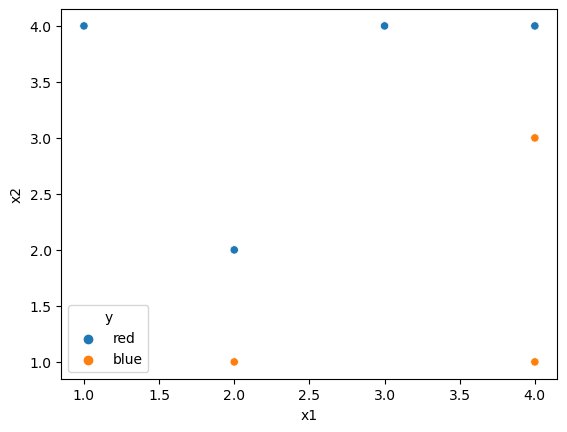

In [5]:
# 6.1 a) Sketch (=plot)
import seaborn as sns

sns.scatterplot(data=df, x='x1', y='x2', hue='y')

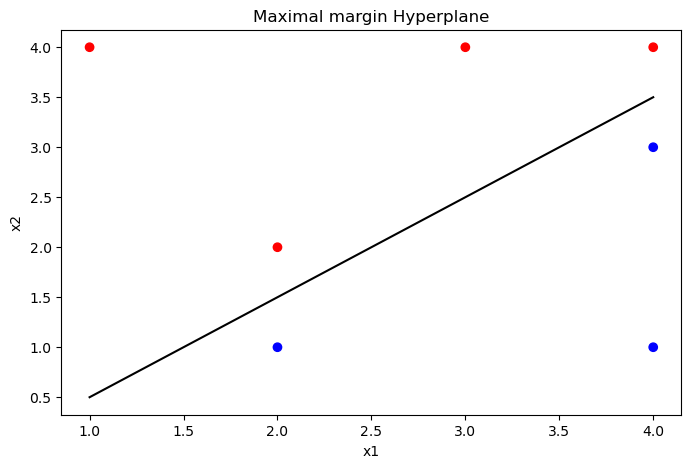

In [9]:
# 6.2 b) Optimal hyperplane
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

x = np.concatenate(([x1], [x2]), axis=0).T

# Fit the SVM model
cost = 10
clf = svm.SVC(kernel='linear', C=cost)
clf.fit(x, y)

beta1, beta2 = clf.coef_[0][0], clf.coef_[0][1]
beta0 = clf.intercept_[0]

x1_hyperplane = np.linspace(1, 4, 2)
x2_hyperplane = - beta1 / beta2 * x1_hyperplane - beta0 / beta2

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x1_hyperplane, x2_hyperplane, '-k')

ax.scatter(x1, x2, c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.title("Maximal margin Hyperplane")
plt.show()

In [13]:
# 6.1 c) beta values: 
print(f"beta0: {beta0:.2f}, beta1: {beta1:.2f}, beta2: {beta2:.2f}")

beta0: 1.00, beta1: -2.00, beta2: 2.00


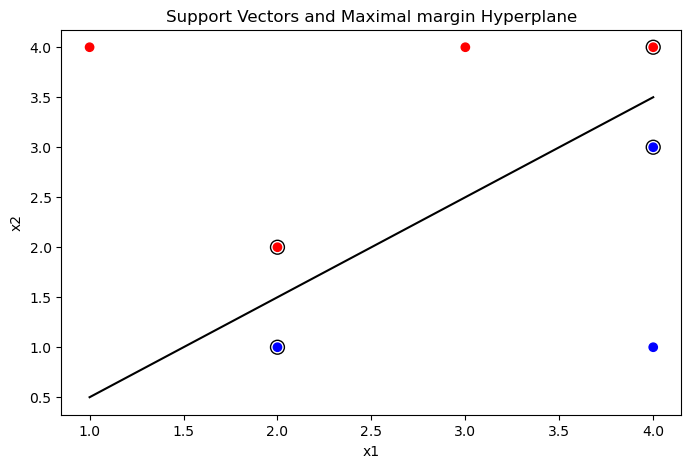

In [15]:
# 6.1 d) Indicate support vectors 

x1_suppvec = clf.support_vectors_[:, 0]
x2_suppvec = clf.support_vectors_[:, 1]

# # Create figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot support vectors
ax.scatter(x1_suppvec, x2_suppvec,
s=100, linewidth=1,
facecolors='none', edgecolors='k')

# Plot hyperplane
ax.plot(x1_hyperplane, x2_hyperplane, 'k-')

# Plot scatter data
ax.scatter(x1, x2, c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.title("Support Vectors and Maximal margin Hyperplane")
plt.show()

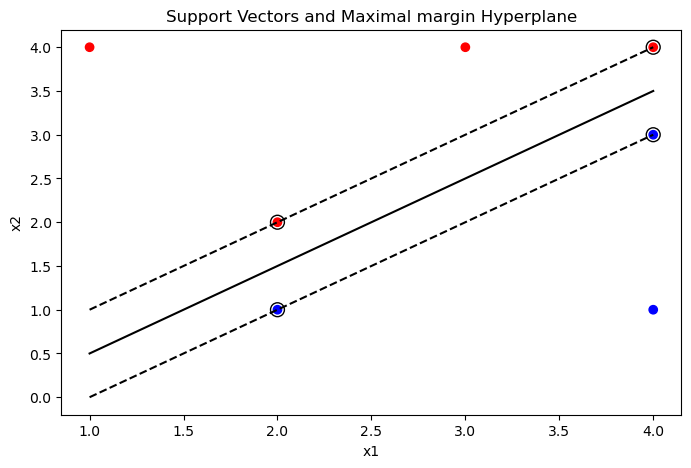

In [16]:
# 6.1 e) indicate margin
offset = 2 + (beta0 + beta1*2) / beta2
# find the margins
x2_upper_margin = x2_hyperplane + offset
x2_lower_margin = x2_hyperplane - offset
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot margins
ax.plot(x1_hyperplane, x2_upper_margin, 'k--')
ax.plot(x1_hyperplane, x2_lower_margin, 'k--')

# Plot support vectors
ax.scatter(x1_suppvec, x2_suppvec,
s=100, linewidth=1,
facecolors='none', edgecolors='k')

# Plot hyperplane
ax.plot(x1_hyperplane, x2_hyperplane, 'k-')

# Plot scatter data
ax.scatter(x1, x2, c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.title("Support Vectors and Maximal margin Hyperplane")
plt.show()

## Aufgabe 6.2

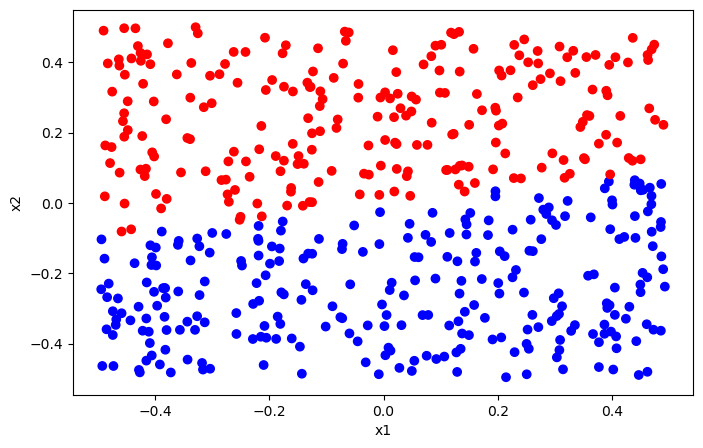

In [7]:
# 6.1 f) Create a new dataset
import numpy as np

np.random.seed(42)
# Create data
n = 500
# x1 and x2 from uniform distribution
x1 = np.random.uniform(size=n) - 0.5
x2 = np.random.uniform(size=n) - 0.5
# y depending on x1 and x2:
y = []
for i in range(n):
    if (-0.2 * x1[i] + x2[i]) > 0:
        y.append('red')
    else:
        y.append('blue')
        
# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1, x2, c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()


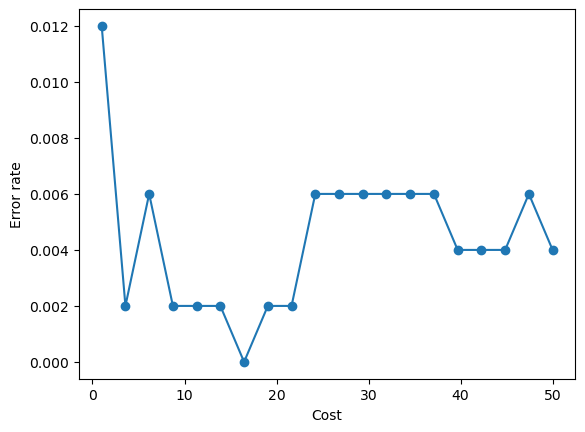

In [8]:
# 6.2 b) cross-validation error rates for svc with a range of cost values

costs = np.linspace(1, 50, 20)
error = []

x = np.concatenate(([x1], [x2]), axis=0).T

for cost in costs: 
    clf = svm.SVC(kernel='linear', C=cost)
    clf.fit(x, y)
    
    # find error
    n = x.shape[0] # size
    y_pred = clf.predict(x)
    error_i = n - (y_pred == y).sum()
    error_i = error_i / n
    error.append(error_i)
    
# Display error
plt.plot(costs, error, '-o')
plt.xlabel('Cost')
plt.ylabel('Error rate')
plt.show()

In [10]:
# cross validation error with built-in function
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Set parameters to be tuned. Other options can be added
costs = np.linspace(1, 50, 20)
tune_parameters = {'C': costs}

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='linear'), tune_parameters,cv=10)

clf_tune.fit(x, y)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']

best_cost = clf_tune.best_params_['C']
print(f"Best cost: {best_cost:.2f}")

Best cost: 21.63


In [ ]:
# plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(costs, error,
'-b', alpha=0.8, label='train error')
ax.plot(costs, error_tune,
'-k', alpha=0.8, label='Cross validation error')
ax.set_xlabel('cost')
ax.set_ylabel('error')
plt.legend()
plt.show()

Cost: 1.00, Test error: 0.00000
Cost: 3.58, Test error: 0.00000
Cost: 6.16, Test error: 0.00000
Cost: 8.74, Test error: 0.00000
Cost: 11.32, Test error: 0.00000
Cost: 13.89, Test error: 0.00000
Cost: 16.47, Test error: 0.00000
Cost: 19.05, Test error: 0.00000
Cost: 21.63, Test error: 0.00000
Cost: 24.21, Test error: 0.00000
Cost: 26.79, Test error: 0.00000
Cost: 29.37, Test error: 0.00000
Cost: 31.95, Test error: 0.01000
Cost: 34.53, Test error: 0.01000
Cost: 37.11, Test error: 0.01000
Cost: 39.68, Test error: 0.01000
Cost: 42.26, Test error: 0.01000
Cost: 44.84, Test error: 0.01000
Cost: 47.42, Test error: 0.01000
Cost: 50.00, Test error: 0.01000


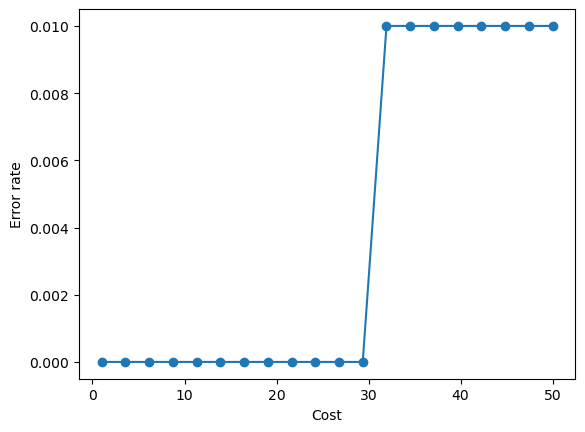

In [61]:
# 6.2 c) test errors

from sklearn.model_selection import train_test_split
# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

costs = np.linspace(1, 50, 20)
error = []

for cost in costs:
    clf = svm.SVC(kernel='linear', C=cost)
    clf.fit(x_train, y_train)
    
    # find error
    n = x_test.shape[0]  # size of test set
    y_pred = clf.predict(x_test)
    error_i = n - (y_pred == y_test).sum()
    error_i = error_i / n
    error.append(error_i)
    print(f"Cost: {cost:.2f}, Test error: {error_i:.5f}")

# Display error
plt.plot(costs, error, '-o')
plt.xlabel('Cost')
plt.ylabel('Error rate')
plt.show()
